In [311]:
!pip install mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import numpy as np

In [312]:
df = pd.read_csv('stream_viewing.csv')
df.head(5)

,Stream ID,1,2,3,4,5
0,10001,Cobra Kai,Lupin,12 Monkeys,Sherlock,NaN
1,10002,Lost,Jack Ryan,The Flash,Game of thrones,NaN
2,10003,Sex Education,Dr. House,Kingdom,The Walking Dead,NaN
3,10004,Ozark,Sex Education,Constantine,Preacher,NaN
4,10005,Naruto,NaN,NaN,NaN,NaN


# 1. What were the 10 most popular shows (based on 'support')?

In [313]:
#Filling the table with dummy values
# turning our categorical data into banary representations
shows = pd.get_dummies(df)
shows.head(1)

,Stream ID,1_12 Monkeys,1_Absentia,1_Alice in Borderland,1_Altered Carbon,1_Archer,1_Arrow,1_Atypical,1_Banshee,1_Berlin Station,...,4_The Witcher,4_Travellers,4_Two and a half men,4_Upload,4_Vikings,4_Westworld,4_White Collar,4_X-Files,5_Better Call Saul,5_Peaky Blinders
0,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [314]:
# Stream ID is irrelevant to creating our show sets
show_sets = shows.drop("Stream ID", axis = 1)
show_sets.head(3)

,1_12 Monkeys,1_Absentia,1_Alice in Borderland,1_Altered Carbon,1_Archer,1_Arrow,1_Atypical,1_Banshee,1_Berlin Station,1_Better Call Saul,...,4_The Witcher,4_Travellers,4_Two and a half men,4_Upload,4_Vikings,4_Westworld,4_White Collar,4_X-Files,5_Better Call Saul,5_Peaky Blinders
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Apriori ML algorithm used to gain insight into the relationships between items

In [315]:
# We build association rules between our shows using the Apriori algorithm, using only items with greater than 2% support (0.02) of the total show set.

# the support of an association rule is the percentage of groups that contain all the items listed in the association rule.
apriori(show_sets, min_support=0.02).head()

C:\Users\Jake\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
0,0.028056,(1)
1,0.024048,(5)
2,0.020040,(6)
3,0.054108,(14)
4,0.082164,(16)


In [316]:
# Showing shows with a popularity greater than 2% in the store
# Tail shows 5 show sets occurring with a frequency greater than 2%
apriori(show_sets, min_support=0.03, use_colnames=True).sort_values('support', ascending=False)

C:\Users\Jake\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
1,0.082164,(1_Daredevil)
8,0.064128,(1_Sex Education)
9,0.060120,(1_The Blacklist)
0,0.054108,(1_Cobra Kai)
13,0.054108,(2_Ozark)
14,0.050100,(2_Sex Education)
3,0.046092,(1_Hanna)
17,0.044088,(2_Two and a half men)
20,0.042084,(4_Sex Education)
6,0.042084,(1_Ozark)


# The 10 most popular shows were:
- Daredevil
- Sex Education
- The Blacklist
- Cobra Kai
- Ozark
- Sex Education
- Hanna
- Two and a half Men
- Sex Education
- Ozark

# 2. Display all the combinations of the 'show' sets (viewed together)

In [317]:
common_showsets = apriori(show_sets, min_support=0.002, use_colnames=True)

#Create a Length column to include combinations of all the item sets.
#So use code 'lambda x:len' go to end of the dataset.
common_showsets['length'] = common_showsets['itemsets'].apply(lambda x:len(x))

# Has to be greater than two to be a set, so using >= 3
common_showsets[common_showsets['length'] >=3].sort_values('support', ascending=False)

C:\Users\Jake\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets,length
2718,0.006012,"(2_Mr. Robot, 3_Succession, 4_Ozark)",3
1914,0.006012,"(3_Demon Slayer, 1_Cobra Kai, 2_The Blacklist)",3
2773,0.006012,"(2_Rick And Morty, 3_Ozark, 4_Sex Education)",3
2015,0.006012,"(3_Outer Banks, 2_Two and a half men, 1_Darede...",3
1919,0.006012,"(1_Cobra Kai, 4_Atypical, 2_The Blacklist)",3
...,...,...,...
2255,0.002004,"(1_Mr. Robot, 2_12 Monkeys, 3_Stranger Things)",3
2254,0.002004,"(2_Banshee, 1_Mirzapur, 3_The Wheel of Time)",3
2253,0.002004,"(3_Startup, 1_Mindhunter, 2_Big Little Lies)",3
2252,0.002004,"(3_Absentia, 1_Mare of Easttown, 4_The Alienist)",3


# 3. Identify the ‘shows’ most likely to be viewed by the same user ID (based on ‘confidence’).

## Explaining these values:

* antecedent - something a user has purchased/streamed already
* consequent - will the user also stream/purchase this item?
* antecedent and consequent support - frequency of antecedent/consequent
* support - frequency of both antecedent and consequent in a single transaction
* confidence - if the antecedent was streamed, how sure are we that the user will also stream the consequent?
* lift - the relationship between the antecedent and consequent

In [318]:
assoc_rules = association_rules(common_showsets, metric='confidence', min_threshold=0.5).sort_values('confidence', ascending=False).drop_duplicates()
assoc_rules.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3359,"(4_Archer, 3_Sopranos)",(2_Kingdom),0.002004,0.012024,0.002004,1.0,83.166667,0.001980,inf
4049,"(2_The Wire, 3_Sex Education)","(1_Arrow, 4_Constantine)",0.002004,0.002004,0.002004,1.0,499.000000,0.002000,inf
4361,"(4_Prison Break, 1_Cobra Kai)","(3_Demon Slayer, 2_The Blacklist)",0.002004,0.012024,0.002004,1.0,83.166667,0.001980,inf
4360,"(3_Demon Slayer, 4_Prison Break)","(1_Cobra Kai, 2_The Blacklist)",0.002004,0.016032,0.002004,1.0,62.375000,0.001972,inf
4359,"(4_Prison Break, 1_Cobra Kai, 2_The Blacklist)",(3_Demon Slayer),0.002004,0.024048,0.002004,1.0,41.583333,0.001956,inf
4358,"(3_Demon Slayer, 4_Prison Break, 2_The Blacklist)",(1_Cobra Kai),0.002004,0.054108,0.002004,1.0,18.481481,0.001896,inf
4357,"(3_Demon Slayer, 4_Prison Break, 1_Cobra Kai)",(2_The Blacklist),0.002004,0.038076,0.002004,1.0,26.263158,0.001928,inf
4356,"(3_Demon Slayer, 4_Atypical)","(1_Cobra Kai, 2_The Blacklist)",0.002004,0.016032,0.002004,1.0,62.375000,0.001972,inf
4355,"(3_Demon Slayer, 4_Atypical, 2_The Blacklist)",(1_Cobra Kai),0.002004,0.054108,0.002004,1.0,18.481481,0.001896,inf
4354,"(3_Demon Slayer, 1_Cobra Kai, 4_Atypical)",(2_The Blacklist),0.002004,0.038076,0.002004,1.0,26.263158,0.001928,inf


# 4. List the top 3 combinations of ‘shows’ viewed together in the same transaction as opposed to separate transactions (based on ‘lift’).

In [319]:
# The business would benefit by recommending consequent values in this list to those who have watched the antecedents
# E.g., a user finishes watching 'Alice in Borderland' should also be recommended 'The Walking Dead'
rules = association_rules(common_showsets, metric='lift', min_threshold=0.5)
rules.nlargest(3, 'lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
156,(1_Billions),(4_How to get away with murder),0.002004,0.002004,0.002004,1.0,499.0,0.002,inf
157,(4_How to get away with murder),(1_Billions),0.002004,0.002004,0.002004,1.0,499.0,0.002,inf
538,(1_Fringe),(2_Shooter),0.002004,0.002004,0.002004,1.0,499.0,0.002,inf


# 5. Display the top 5 combined ‘shows’ in one transaction (based on 'lift').

In [320]:
# Identify the top 5 combined products in 1 transaction - based on highest 'lift' value
# This is useful information for determining which promotions to run, for example.
# E.g., users who purchase 'Billions' to watch will get a 50% discount on 'How to Get Away With Murder', likely users would avail of this offer
rules[(rules['lift'] > 1.0) & (rules['confidence'] > 0.5)].nlargest(5, 'lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
156,(1_Billions),(4_How to get away with murder),0.002004,0.002004,0.002004,1.0,499.0,0.002,inf
157,(4_How to get away with murder),(1_Billions),0.002004,0.002004,0.002004,1.0,499.0,0.002,inf
538,(1_Fringe),(2_Shooter),0.002004,0.002004,0.002004,1.0,499.0,0.002,inf
539,(2_Shooter),(1_Fringe),0.002004,0.002004,0.002004,1.0,499.0,0.002,inf
786,(3_Startup),(1_Mindhunter),0.002004,0.002004,0.002004,1.0,499.0,0.002,inf


# 6. Include any extra code (or plot any graph) that you think would help StreamMedia management interpret their behaviour data.

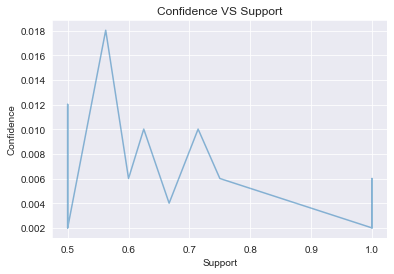

In [332]:
# Plotting confidence vs support
plt.plot(assoc_rules['confidence'],assoc_rules['support'],  alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Confidence VS Support')
plt.show()

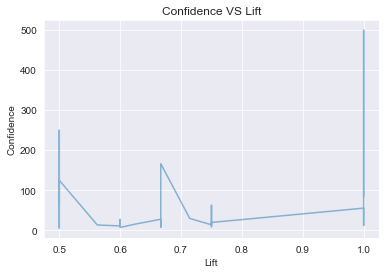

In [333]:
# Plotting confidence vs lift
plt.plot(assoc_rules['confidence'],assoc_rules['lift'],  alpha=0.5)
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Confidence VS Lift')
plt.show()

In [323]:
# A bubble chart. Bubble sizes representing how often a title appears.
# Plot how often each show appears in the common show sets
import plotly.express as px
# For regular expressions
import re
df = px.data.gapminder()

showsets_three = common_showsets[common_showsets['length'] >=3].sort_values('support', ascending=False)['itemsets']

# Match a string in the following format: '_1 Mr. Robot', with or without space or special characters

def getString(i):
    set = re.search("('*_.*[a-zA-Z0-9]*')", str(i))[0]

    # # Remove remaining numbers in the title
    set = re.sub("[0-9]", '', set)
    # Remove remaining underscores
    set = set.replace('_', '')
    # Replacing single quotes
    set.replace("'", '')

    return set.split(',')

show_arr = []


# Printing a clean version of all sets
for val, i in (enumerate(showsets_three)):
    try:
        show_arr.append(getString(i))
    except KeyError:
        pass

# I had the intention of using pyplot for a similar result to this, but ran out of time.
# https://plotly.com/python/bubble-charts/
